## Linear Regression :

In [30]:
# for Multiple Linear Regression with Gradient Descent we have to focus on this three things:

# 1) Straight Line
# # - it is linear regression formula

# 2) Cost Function
# # - it will give errors from the linear regression formula, like it substract predected value from actual value

# 3) Gradient Descent
# # - it helps us to minimize the error


In [50]:
# import liberaries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv('C:\\Users\\hemant\\Downloads\\winequality\\winequality-red.csv', delimiter = ";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [52]:
data.shape

(1599, 12)

In [53]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [44]:
# split data into independent and dependent variables --

df_data = data.values

X = df_data[:,:-1]
Y = df_data[:,-1].reshape(df_data.shape[0], 1)


In [45]:
# for completing the straight line formula we have to add one more column with independent variables which is one's --

X = np.vstack((np.ones((X.shape[0], )), X.T)).T


In [46]:
# I use sklearn only for split data into training and testing set --

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)


In [48]:
# shape of the data --

print(X_train.shape)
print(X_test.shape)


(1119, 12)
(480, 12)


In [60]:
# build linear regression model -

def linear_model(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((X.shape[1], 1))
    
    cost_value = []
    
    for i in range(iteration):
        
        Y_pred = np.dot(X, theta)
        
        
        # formula for cost functionn --
        cost_func = (1/(2*m))*np.sum(np.square(Y_pred - Y))
        
        # formula for gradient descent --
        d_theta = (1/m)*np.dot(X.T, Y_pred - Y)
        theta = theta - learning_rate * d_theta
        
        
        cost_value.append(cost_func)
        
        
        if(i%(iteration/10) == 0):
            print("Cost is : ", cost_func)
        
    return theta, cost_value

In [100]:

iteration = 1000
learning_rate = 0.0001   # learning rate should always be lesser
theta, cost_value = linear_model(X,Y, learning_rate = learning_rate, iteration = iteration)


Cost is :  16.20825515947467
Cost is :  1.536782579656414
Cost is :  0.6668879343258541
Cost is :  0.42297597595049724
Cost is :  0.3394841845773599
Cost is :  0.306524572218226
Cost is :  0.29210485374336365
Cost is :  0.285099244322709
Cost is :  0.28119827117183144
Cost is :  0.2786422973293378


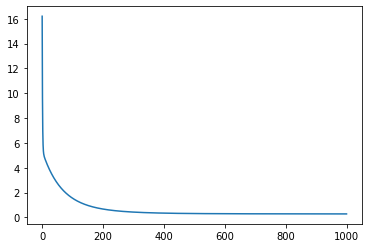

In [101]:
# now we check the shape ---

shape = np.arange(0, iteration)
plt.plot(shape, cost_value)
plt.show()


In [107]:

# it is showing error - -

Y_pred = np.dot(X_test, theta)
residual = (1/X_test.shape[0])*np.sum(np.abs(Y_pred - Y_test))
print("Errors : ", residual)

Errors :  0.5623094613817357


In [108]:
# accuracy -

print("Accuracy : " , round(1-residual, 4)*100)

Accuracy :  43.769999999999996


In [110]:
# --


# b) -


## Logistic Regression : 


In [235]:

# for Logistic Regression with Gradient Descent we have to focus on this three things:

# 1) Sigmoid Function
# # - this is used in Logistic Regression model, it gives values in between 0 to 1.

# 2) Cost Function
# # - it will give errors from the logistic Regression 

# 3) Gradient Descent
# # - it helps us to minimize the error


In [236]:
# import liberaries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [237]:
# load the data --

train = pd.read_csv('C:\\Users\\hemant\\Downloads\\Logistic_Dataset\\train.csv')
test = pd.read_csv('C:\\Users\\hemant\\Downloads\\Logistic_Dataset\\test.csv')


In [238]:
# check null values --

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [239]:
# 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [240]:
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [241]:
# here we fill null with the mean of the same variable --

train.Age = train.Age.fillna(train.Age.mean())
test.Age = test.Age.fillna(test.Age.mean())
test.Fare = test.Fare.fillna(test.Fare.mean())


In [242]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [243]:
# drop unnecessary columns --

train = train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)

test = test.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1)


In [244]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [245]:
test.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [246]:
# now we perform encoding : 

train = pd.get_dummies(train, drop_first = True)
test = pd.get_dummies(test, drop_first = True)


In [247]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [248]:
train.shape

(891, 9)

In [249]:
train = train.rename(columns = {'Sex_male': 'Sex'}, inplace = False)
test = test.rename(columns = {'Sex_male': 'Sex'}, inplace = False)

In [264]:
print(train)

[[ 0.          3.         22.         ...  1.          0.
   1.        ]
 [ 1.          1.         38.         ...  0.          0.
   0.        ]
 [ 1.          3.         26.         ...  0.          0.
   1.        ]
 ...
 [ 0.          3.         29.69911765 ...  0.          0.
   1.        ]
 [ 1.          1.         26.         ...  1.          0.
   0.        ]
 [ 0.          3.         32.         ...  1.          1.
   0.        ]]


In [250]:
# --

train = train.values
test = test.values


In [251]:
train.shape

(891, 9)

In [252]:
# train[:,1:]

In [253]:
# split into independent and dependent variable - -

x_train = train[:,1:].T
x_test = test.T

y_train = train[:, 0].reshape(1, x_train.shape[1])
y_test = test[:, 0].reshape(1, x_test.shape[1])

In [254]:
# train[:,1:]

In [255]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(8, 891)
(1, 891)
(8, 418)
(1, 418)


In [383]:
#  sigmoid - 

def sig_func(x):
    return 1/(1 + np.exp(-x))


In [384]:
# prepare model  --

def logistic_model(X, Y, learning_rate, iteration):
    
    m = x_train.shape[1]
    n = x_train.shape[0]
    
    W = np.zeros((n, 1))
    B = 0
    
    cost_value = []
    
    for i in range(iteration):
        
        Z = np.dot(W.T, X) + B
        A = sig_func(Z)
        
        # cost functio - -
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Decsent  -
        dw = (1/m)*np.dot(A-Y, X.T)
        db = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dw.T
        B = B - learning_rate*db
        
        cost_value.append(cost)
        
        if(i%(iteration/10) == 0):
            print("Cost after ", i, "iteration is : ", cost)
    
    return W, B, cost_value

In [382]:
# define -- 

iteration = 1000
learning_rate = 0.0025
W,B, cost_value = logistic_model(x_train, y_train, learning_rate = learning_rate, iteration = iteration)

Cost after  0 iteration is :  0.6931471805599454
Cost after  100 iteration is :  0.6163641288781306
Cost after  200 iteration is :  0.609458733222927
Cost after  300 iteration is :  0.6037640663663651
Cost after  400 iteration is :  0.5989770137267972
Cost after  500 iteration is :  0.5948722737230648
Cost after  600 iteration is :  0.5912836621733083
Cost after  700 iteration is :  0.5880889765474127
Cost after  800 iteration is :  0.5851983538792929
Cost after  900 iteration is :  0.5825455718973401


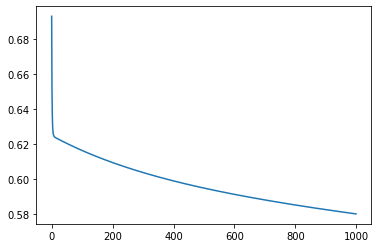

In [385]:

plt.plot(np.arange(iteration), cost_value)

In [372]:
# accuracy  --

# def accuracy(X, Y, W, B):
    
#     Z = np.dot(W.T, X) + B
#     A = sig_func(Z)
    
#     A = A > 0.5
    
#     A = np.array(A, dtype = 'int64')
    
#     accuracy = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
#     print("Accuracy of the model is : ", round(accuracy, 2), "%")
    
# accuracy(x_test, y_test, W, B)    

In [285]:
#  Q.2) --

## Pandas -

In [350]:

import pandas as pd

new = pd.read_csv("C:\\Users\\hemant\\Downloads\\movie_metadata.csv")

new.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [351]:
new.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [352]:
new.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [353]:
new.title_year.unique()

array([2009., 2007., 2015., 2012.,   nan, 2010., 2016., 2006., 2008.,
       2013., 2011., 2014., 2005., 1997., 2004., 1999., 1995., 2003.,
       2001., 2002., 1998., 2000., 1990., 1991., 1994., 1996., 1982.,
       1993., 1979., 1992., 1989., 1984., 1988., 1978., 1962., 1980.,
       1972., 1981., 1968., 1985., 1940., 1963., 1987., 1986., 1973.,
       1983., 1976., 1977., 1970., 1971., 1969., 1960., 1965., 1964.,
       1927., 1974., 1937., 1975., 1967., 1951., 1961., 1946., 1953.,
       1954., 1959., 1932., 1947., 1956., 1945., 1952., 1930., 1966.,
       1939., 1950., 1948., 1958., 1957., 1943., 1944., 1938., 1949.,
       1936., 1941., 1955., 1942., 1929., 1935., 1933., 1916., 1934.,
       1925., 1920.])

In [354]:
# check null vaues - 

new.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [355]:

# fillna  --

new_data = new.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()[0]))


In [356]:

new_data.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [357]:
new_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000000,178.000000,0.0,855.000000,Joel David Moore,1000.0,7.605058e+08,Action|Adventure|Fantasy|Sci-Fi,...,3054.000000,English,USA,PG-13,2.370000e+08,2009.000000,936.0,7.9,1.780000,33000
1,Color,Gore Verbinski,302.000000,169.000000,563.0,1000.000000,Orlando Bloom,40000.0,3.094042e+08,Action|Adventure|Fantasy,...,1238.000000,English,USA,PG-13,3.000000e+08,2007.000000,5000.0,7.1,2.350000,0
2,Color,Sam Mendes,602.000000,148.000000,0.0,161.000000,Rory Kinnear,11000.0,2.000742e+08,Action|Adventure|Thriller,...,994.000000,English,UK,PG-13,2.450000e+08,2015.000000,393.0,6.8,2.350000,85000
3,Color,Christopher Nolan,813.000000,164.000000,22000.0,23000.000000,Christian Bale,27000.0,4.481306e+08,Action|Thriller,...,2701.000000,English,USA,PG-13,2.500000e+08,2012.000000,23000.0,8.5,2.350000,164000
4,Color,Doug Walker,140.194272,107.201074,131.0,645.009761,Rob Walker,131.0,4.846841e+07,Documentary,...,272.770808,English,USA,R,3.975262e+07,2002.470517,12.0,7.1,2.220403,0


In [358]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5043 non-null   object 
 1   director_name              5043 non-null   object 
 2   num_critic_for_reviews     5043 non-null   float64
 3   duration                   5043 non-null   float64
 4   director_facebook_likes    5043 non-null   float64
 5   actor_3_facebook_likes     5043 non-null   float64
 6   actor_2_name               5043 non-null   object 
 7   actor_1_facebook_likes     5043 non-null   float64
 8   gross                      5043 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5043 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [359]:
# in the above cell we can most of the data type of the variables are wrong --
 # so we will change this by the right data type --
    
new_data['director_facebook_likes'] = new_data['director_facebook_likes'].astype("int64")
new_data['actor_3_facebook_likes'] = new_data['actor_3_facebook_likes'].astype("int64")
new_data['actor_1_facebook_likes'] = new_data['actor_1_facebook_likes'].astype("int64")
new_data['actor_2_facebook_likes'] = new_data['actor_2_facebook_likes'].astype("int64")



In [360]:
# loc --
# you can give any row number and get meaningful information from the data --

new_data.loc[[3,5,8,11,15], ['movie_title', 'genres' , 'budget', 'gross', 'imdb_score', 'director_name', 'actor_1_name']]


,movie_title,genres,budget,gross,imdb_score,director_name,actor_1_name
3,The Dark Knight Rises,Action|Thriller,250000000.0,448130642.0,8.5,Christopher Nolan,Tom Hardy
5,John Carter,Action|Adventure|Sci-Fi,263700000.0,73058679.0,6.6,Andrew Stanton,Daryl Sabara
8,Avengers: Age of Ultron,Action|Adventure|Sci-Fi,250000000.0,458991599.0,7.5,Joss Whedon,Chris Hemsworth
11,Superman Returns,Action|Adventure|Sci-Fi,209000000.0,200069408.0,6.1,Bryan Singer,Kevin Spacey
15,Man of Steel,Action|Adventure|Fantasy|Sci-Fi,225000000.0,291021565.0,7.2,Zack Snyder,Henry Cavill


In [361]:
# iloc -- 

new_data.iloc[:,1:5]


,director_name,num_critic_for_reviews,duration,director_facebook_likes
0,James Cameron,723.000000,178.000000,0
1,Gore Verbinski,302.000000,169.000000,563
2,Sam Mendes,602.000000,148.000000,0
3,Christopher Nolan,813.000000,164.000000,22000
4,Doug Walker,140.194272,107.201074,131
...,...,...,...,...
5038,Scott Smith,1.000000,87.000000,2
5039,Steven Spielberg,43.000000,43.000000,686
5040,Benjamin Roberds,13.000000,76.000000,0
5041,Daniel Hsia,14.000000,100.000000,0


In [362]:

# group --
# it helps us to extract data from any year

group = new_data.groupby('title_year')
print(group.get_group(2010))

      color    director_name  num_critic_for_reviews  duration  \
7     Color     Nathan Greno                   324.0     100.0   
22    Color     Ridley Scott                   343.0     156.0   
33    Color       Tim Burton                   451.0     108.0   
40    Color  Joseph Kosinski                   469.0     125.0   
43    Color      Lee Unkrich                   453.0     103.0   
...     ...              ...                     ...       ...   
4877  Color      Tom Seidman                     4.0      98.0   
4900  Color   David G. Evans                    25.0     101.0   
4902  Color       Tom Tykwer                    76.0     119.0   
4908  Color     Eric Valette                    42.0      94.0   
4987  Color      Lena Dunham                   113.0      98.0   

      director_facebook_likes  actor_3_facebook_likes        actor_2_name  \
7                          15                     284        Donna Murphy   
22                          0                     738

In [363]:
# sort
# here we do sorting on the gross amount of movie in descending order --

new_data.sort_values(by = "gross", ascending = False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0,855,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0,794,Kate Winslet,29000,658672302.0,Drama|Romance,...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365,1000,Judy Greer,3000,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000,7.0,2.00,150000
17,Color,Joss Whedon,703.0,173.0,0,19000,Robert Downey Jr.,26000,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000,8.1,1.85,123000
794,Color,Joss Whedon,703.0,173.0,0,19000,Robert Downey Jr.,26000,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000,8.1,1.85,123000


In [387]:
# for budget --

new_data.sort_values(by = "budget", ascending = False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584,74,Kang-ho Song,629,2201412.0,Comedy|Drama|Horror|Sci-Fi,...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0,38,Yeong-ae Lee,717,211667.0,Crime|Drama,...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45,0,Péter Fancsikai,9,195888.0,Drama|Romance|War,...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000,745,Jada Pinkett Smith,893,2298191.0,Adventure|Animation|Fantasy,...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78,101,Robin Atkin Downes,488,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336,6.9,1.85,973


In [375]:

# mean --

new_data.gross.mean()

48468407.52680692

In [390]:
#extracting - 

new_data[(new_data['country'] == "India")].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1056,Color,Deepa Mehta,34.0,110.0,375,59,Gulshan Grover,113,5.289720e+05,Drama|Romance|War,...,55.0,Hindi,India,Unrated,3.975262e+07,1998.0,102,7.8,2.220403,522
1329,Color,S.S. Rajamouli,44.0,159.0,50,72,Anushka Shetty,218,6.498000e+06,Action|Adventure|Drama|Fantasy|War,...,410.0,Telugu,India,R,1.802615e+07,2015.0,133,8.4,1.850000,21000
2349,Color,Gnana Rajasekaran,2.0,153.0,0,7,Michael Lieber,109,4.846841e+07,Biography|Drama|History,...,1.0,English,India,R,3.975262e+07,2014.0,36,7.0,2.350000,58
3075,Color,Karan Johar,20.0,193.0,160,860,John Abraham,8000,3.275443e+06,Drama,...,264.0,Hindi,India,R,7.000000e+08,2006.0,1000,6.0,2.350000,659
3085,Color,Sajid Khan,10.0,144.0,0,119,Boman Irani,564,1.165104e+06,Comedy,...,43.0,Hindi,India,R,3.975262e+07,2010.0,154,5.3,2.220403,250


In [396]:

new_data[['movie_title', 'budget', 'gross']][(new_data['gross']> 600000000.0)]

,movie_title,budget,gross
0,Avatar,237000000.0,760505847.0
17,The Avengers,220000000.0,623279547.0
26,Titanic,200000000.0,658672302.0
29,Jurassic World,150000000.0,652177271.0
794,The Avengers,220000000.0,623279547.0
